# Hello world

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeTorontoV2
import matplotlib.pyplot as plt


In [15]:
depths = range(1, 501)  
z_expectations = []

simulator = AerSimulator()

for d in depths:
    qc = QuantumCircuit(1, 1)
    for _ in range(d):
        qc.x(0)  
    qc.measure(0, 0)  
    print(qc)

    transpiled_qc = transpile(qc, simulator,optimization_level=0)
    
    # 시뮬레이션 실행
    result = simulator.run(transpiled_qc, shots=1024).result()
    counts = result.get_counts()
    
    # 기댓값 계산
    z_expectation = (counts.get('0', 0) - counts.get('1', 0)) / 1024
    z_expectations.append(z_expectation)

     ┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 
     ┌───┐┌───┐┌─┐
  q: ┤ X ├┤ X ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 
     ┌───┐┌───┐┌───┐┌─┐
  q: ┤ X ├┤ X ├┤ X ├┤M├
     └───┘└───┘└───┘└╥┘
c: 1/════════════════╩═
                     0 
     ┌───┐┌───┐┌───┐┌───┐┌─┐
  q: ┤ X ├┤ X ├┤ X ├┤ X ├┤M├
     └───┘└───┘└───┘└───┘└╥┘
c: 1/═════════════════════╩═
                          0 
     ┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
  q: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤M├
     └───┘└───┘└───┘└───┘└───┘└╥┘
c: 1/══════════════════════════╩═
                               0 
     ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
  q: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└╥┘
c: 1/═══════════════════════════════╩═
                                    0 
     ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
  q: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└╥┘
c: 1/════════════════════════════════════╩═
                             

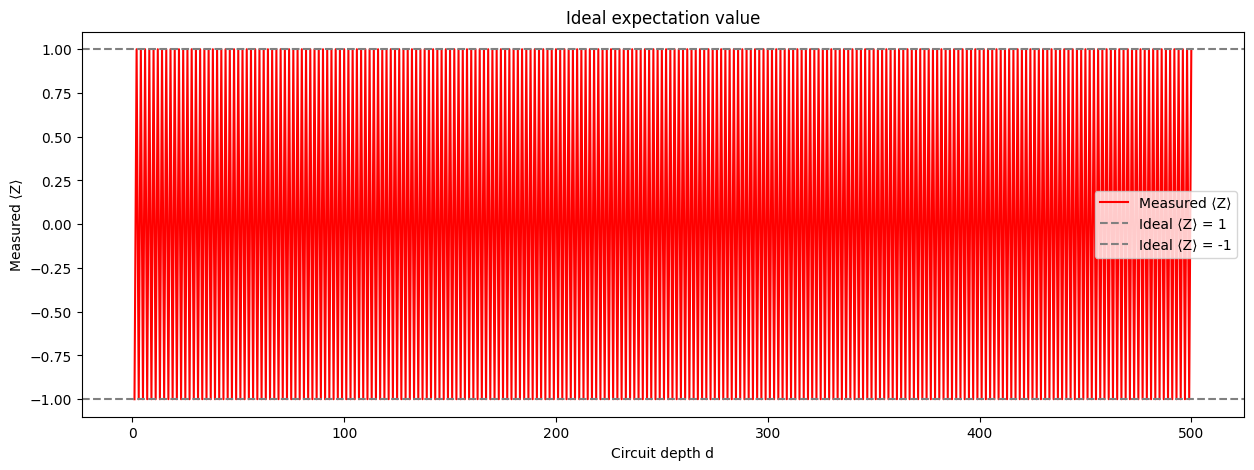

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(depths, z_expectations, 'r-', label='Measured ⟨Z⟩')
plt.axhline(y=1, color='gray', linestyle='--', label='Ideal ⟨Z⟩ = 1')
plt.axhline(y=-1, color='gray', linestyle='--', label='Ideal ⟨Z⟩ = -1')
plt.xlabel("Circuit depth d")
plt.ylabel("Measured ⟨Z⟩")
plt.title("Ideal expectation value")
plt.legend()
plt.show()

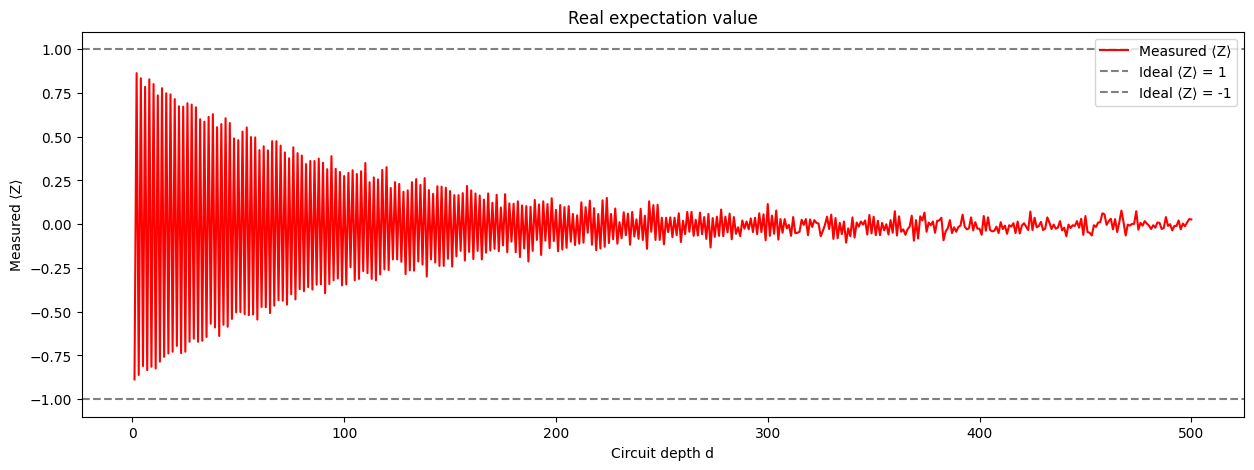

In [14]:
backend = FakeTorontoV2()

# 초기화
depths = range(1, 501)  # Circuit depth from 1 to 100
circuits = []  # 생성된 회로를 담을 리스트

# 회로 생성
for d in depths:
    qc = QuantumCircuit(1, 1)
    for _ in range(d):
        qc.x(0)  # X 게이트 적용
    qc.measure(0, 0)  # Z-기준 측정
    circuits.append(qc)  # 회로를 리스트에 추가

# 회로를 백엔드에 맞게 트랜스파일
transpiled_circuits = transpile(circuits, backend=backend,optimization_level=0)

# 트랜스파일된 회로를 한 번에 실행
job = backend.run(transpiled_circuits, shots=1024)
result = job.result()   

# 각 회로의 기댓값 계산
z_expectations = []
for d in depths:
    counts = result.get_counts(d - 1)  # 각 회로의 결과 가져오기 (인덱스는 0부터 시작)
    z_expectation = (counts.get('0', 0) - counts.get('1', 0)) / 1024
    z_expectations.append(z_expectation)

# 결과 시각화
plt.figure(figsize=(15, 5))
plt.plot(depths, z_expectations, 'r-', label='Measured ⟨Z⟩')
plt.axhline(y=1, color='gray', linestyle='--', label='Ideal ⟨Z⟩ = 1')
plt.axhline(y=-1, color='gray', linestyle='--', label='Ideal ⟨Z⟩ = -1')
plt.xlabel("Circuit depth d")
plt.ylabel("Measured ⟨Z⟩")
plt.title("Real expectation value")
plt.legend()
plt.show()